<a href="https://colab.research.google.com/github/mukul-mschauhan/big-mart/blob/main/Food_Demand_ML_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

This week’s challenge focuses on developing a predictive model for food demand forecasting. Accurate forecasting is crucial for food supply chain management, allowing businesses to minimize waste and optimize inventory.

About the Dataset
The dataset consists of historical food demand data from various facilities, regions, and categories. You’ll analyze patterns and trends to predict future demand for food items, helping businesses make informed decisions.

Dataset Description:

Train.csv: Contains historical data with features like food items, demand quantity, and additional contextual information (e.g., promotions types).
Test.csv: The dataset for which you will generate predictions.
Submission.csv: The format for submitting your predictions.

In [2]:
# Import Train and Test

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.shape, test.shape

((321437, 13), (118070, 12))

In [4]:
combined = pd.concat([train, test], ignore_index=True)
train.shape,  test.shape, combined.shape

((321437, 13), (118070, 12), (439507, 13))

In [6]:
combined.head(2)

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion


### EDA

1. Univariate
2. Bivariate Analysis
3. Missing Values
4. Outlier Identification
5. Feature Engg
6. **Statistical Hyp Tests**
7. Scaling & Transformation

In [7]:
# Numerical Vars

combined.select_dtypes(include='number').columns

Index(['Period_No', 'Facility_No', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count'],
      dtype='object')

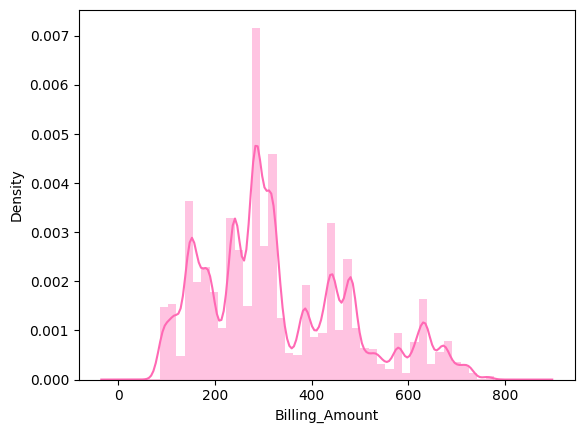

In [9]:
# Billing Amount
sns. distplot(combined.Billing_Amount, color = "hotpink")
plt.show()

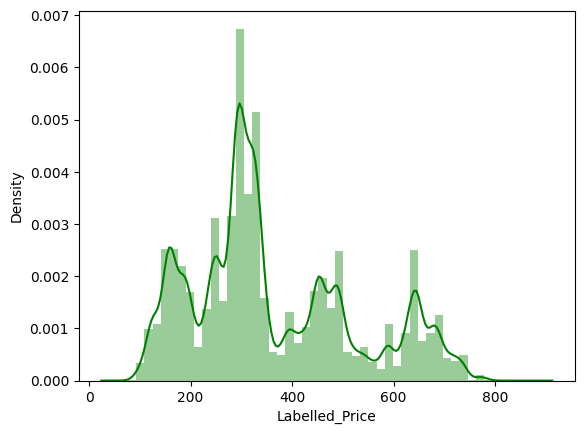

In [11]:
# Billing Amount
sns. distplot(combined.Labelled_Price, color = "green")
plt.show()

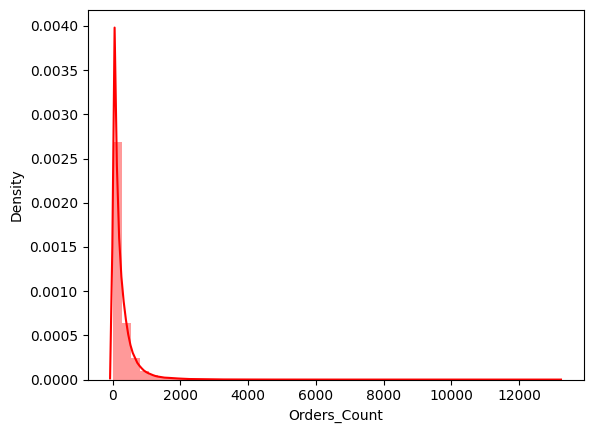

In [13]:
# Billing Amount
sns. distplot(combined.Orders_Count, color = "red")
plt.show()

In [14]:
combined.Orders_Count.describe()

,Orders_Count
count,321437.000000
mean,261.533790
std,383.785233
min,13.000000
25%,54.000000
50%,136.000000
75%,324.000000
max,13150.000000


In [15]:
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile'],
      dtype='object')

In [18]:
# Top 5 Facilities
combined.Facility_No.value_counts()[:5].index

Index([63, 13, 87, 112, 36], dtype='int64', name='Facility_No')

In [21]:
top5 = [63, 13, 87, 112, 36]
def facility(x):
  if x in top5:
    return("Top5")
  else:
    return("Others")

combined["Facility"] = combined.Facility_No.apply(facility)

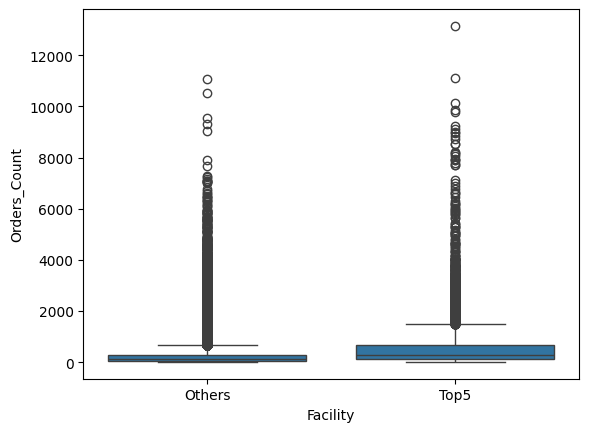

In [22]:
sns.boxplot(x = "Facility", y = "Orders_Count", data = combined)
plt.show()

In [25]:
combined.Operational_Region_Coverage_Area.value_counts()[:5].index

Index([62, 41, 574, 12, 1], dtype='int64', name='Operational_Region_Coverage_Area')

In [26]:
top5 = [62, 41, 574, 12, 1]

def ops(x):
  if x in top5:
    return("Top5_Area")
  else:
    return("Other_Area")

In [27]:
combined["Op_Area"] = combined.Operational_Region_Coverage_Area.apply(ops)

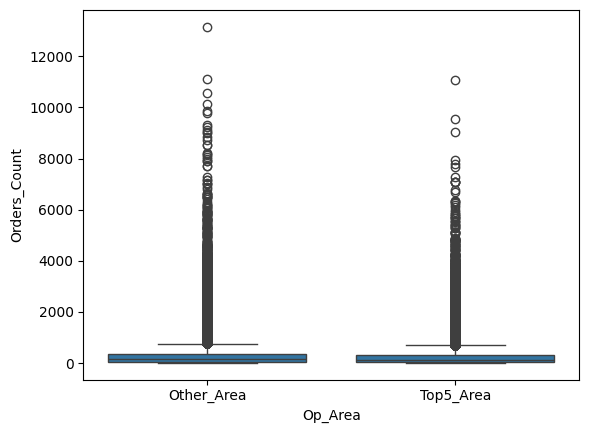

In [28]:
sns.boxplot(x = "Op_Area",
            y = "Orders_Count", data = combined)
plt.show()

In [31]:
# Promotions
combined["Promotions"] = combined.Custom_Promoted+\
combined.Promoted+combined.Search_Promotions


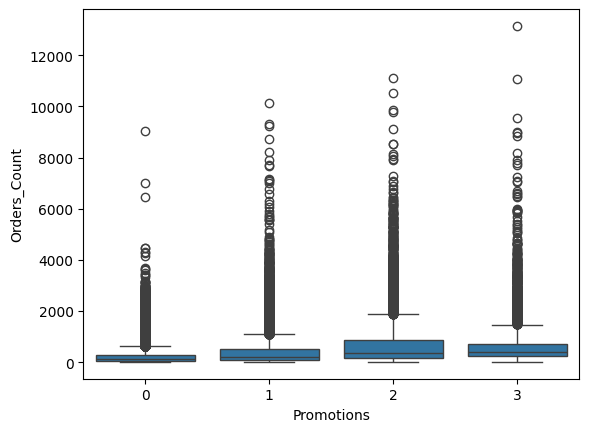

In [32]:
sns.boxplot(x = "Promotions", y = "Orders_Count", data = combined)
plt.show()

In [39]:
combined.head()

,Period_No,Facility_No,Facility_Category,City_Zip_Code,Operational_Region_Coverage_Area,Billing_Amount,Labelled_Price,Custom_Promoted,Promoted,Search_Promotions,Orders_Count,Course,Flavour_Profile,Facility,Op_Area,Promotions,Course_Cat
0,1,324,c1,977,169,192.955562,267.971749,0,0,0,123.0,Finger Foods,Asian Fusion,Others,Other_Area,0,Other_Foods
1,1,10,c3,0,62,193.384864,203.836706,0,0,0,55.0,Broths & Stews,Asian Fusion,Others,Top5_Area,0,Other_Foods
2,1,99,c3,0,167,384.988183,388.957411,0,0,0,204.0,Smoothies & Juices,Western,Others,Other_Area,0,Top5_Foods
3,1,95,c3,17,2,255.251864,263.923874,0,0,0,257.0,Grain Bowls,South Asian,Others,Other_Area,0,Top5_Foods
4,1,128,c3,17,18,319.949514,326.128813,0,0,0,14.0,Appetizers,Asian Fusion,Others,Other_Area,0,Other_Foods


In [34]:
combined.Course.unique()

array(['Finger Foods', 'Broths & Stews', 'Smoothies & Juices',
       'Grain Bowls', 'Appetizers', 'Grilled Vegetables',
       'Sweets & Treats', 'Wraps & Rolls', 'Noodles & Veggies',
       'Fresh Greens', 'Condiments & Dips', 'Plant-Based Proteins',
       'Stir-Fried Rice', 'Flatbreads'], dtype=object)

In [37]:
combined.groupby("Flavour_Profile")["Course"].value_counts()

# Smoothies & Juices, Wraps & Rolls, Grain Bowls, Flatbreads
foods = ["Smoothies & Juices", "Wraps & Rolls",
         "Grain Bowls", "Flatbreads"]

def khana_khazana(x):
  if x in foods:
    return("Top5_Foods")
  else:
    return("Other_Foods")

combined["Course_Cat"] = combined.Course.apply(khana_khazana)


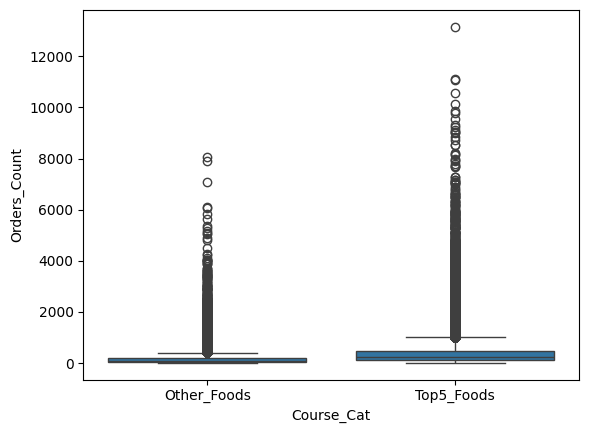

In [38]:
sns.boxplot(x = "Course_Cat", y = "Orders_Count", data = combined)
plt.show()

In [41]:
# Facility No
combined.groupby("Facility_No")["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
Facility_No,,,,,,,,
3,3847.0,179.099038,196.578163,13.0,42.0,122.0,243.0,2052.0
4,3686.0,196.133749,243.226825,13.0,41.0,123.0,270.0,3523.0
5,4171.0,282.143131,277.867416,13.0,95.0,203.0,378.0,2753.0
6,3677.0,179.811803,207.581795,13.0,41.0,121.0,244.0,2970.0
7,4218.0,195.700806,251.982207,13.0,41.0,107.0,269.0,4227.0
...,...,...,...,...,...,...,...,...
988,4314.0,278.150672,279.311236,13.0,82.0,189.0,379.0,2957.0
1476,4227.0,207.433877,243.021249,13.0,54.0,134.0,284.0,3295.0
1836,4149.0,280.976139,448.862979,13.0,41.0,108.0,379.0,7073.0


In [43]:
combined["Magic1"]=  combined.groupby("Facility_No")\
 ["Orders_Count"].transform("count")

combined["Magic2"]=  combined.groupby("Facility_No")\
 ["Orders_Count"].transform("min")

combined["Magic3"]=  combined.groupby("Facility_No")\
 ["Orders_Count"].transform("max")

combined["Magic4"]=  combined.groupby("Facility_No")\
 ["Orders_Count"].transform("mean")

combined["Magic5"]=  combined.groupby("Facility_No")\
 ["Orders_Count"].transform("median")

combined["Magic6"]=  combined.groupby("Facility_No")\
 ["Orders_Count"].transform("std")

In [45]:
combined.groupby('City_Zip_Code')["Orders_Count"].describe()

,count,mean,std,min,25%,50%,75%,max
City_Zip_Code,,,,,,,,
0,134451.0,318.114131,464.342597,13.0,55.0,161.0,404.0,13150.0
17,81986.0,203.351487,263.878412,13.0,53.0,122.0,269.0,6426.0
153,4511.0,245.492795,344.797660,13.0,42.0,109.0,323.5,3849.0
357,4041.0,235.813660,489.664875,13.0,53.0,121.0,256.0,9303.0
582,21943.0,286.437224,385.943459,13.0,55.0,149.0,365.0,7073.0
601,3671.0,121.629256,132.423545,13.0,28.0,81.0,175.0,1849.0
863,4474.0,334.867456,535.232145,13.0,54.0,134.0,432.0,7155.0
977,66360.0,215.997107,289.687066,13.0,53.0,134.0,284.0,9532.0


In [46]:
combined["Magic7"]=  combined.groupby("City_Zip_Code")\
 ["Orders_Count"].transform("count")

combined["Magic8"]=  combined.groupby("City_Zip_Code")\
 ["Orders_Count"].transform("min")

combined["Magic9"]=  combined.groupby("City_Zip_Code")\
 ["Orders_Count"].transform("max")

combined["Magic10"]=  combined.groupby("City_Zip_Code")\
 ["Orders_Count"].transform("mean")

combined["Magic11"]=  combined.groupby("City_Zip_Code")\
 ["Orders_Count"].transform("median")

combined["Magic12"]=  combined.groupby("City_Zip_Code")\
 ["Orders_Count"].transform("std")

In [50]:
# Food Category
combined["Magic13"]=  combined.groupby("Course")\
 ["Orders_Count"].transform("count")

combined["Magic14"]=  combined.groupby("Course")\
 ["Orders_Count"].transform("min")

combined["Magic15"]=  combined.groupby("Course")\
 ["Orders_Count"].transform("max")

combined["Magic16"]=  combined.groupby("Course")\
 ["Orders_Count"].transform("mean")

combined["Magic17"]=  combined.groupby("Course")\
 ["Orders_Count"].transform("median")

combined["Magic18"]=  combined.groupby("Course")\
 ["Orders_Count"].transform("std")

In [52]:
#Operational_Region_Coverage_Area
combined["Magic19"]=  combined.groupby("Operational_Region_Coverage_Area")\
 ["Orders_Count"].transform("count")

combined["Magic20"]=  combined.groupby("Operational_Region_Coverage_Area")\
 ["Orders_Count"].transform("min")

combined["Magic21"]=  combined.groupby("Operational_Region_Coverage_Area")\
 ["Orders_Count"].transform("max")

combined["Magic22"]=  combined.groupby("Operational_Region_Coverage_Area")\
 ["Orders_Count"].transform("mean")

combined["Magic23"]=  combined.groupby("Operational_Region_Coverage_Area")\
 ["Orders_Count"].transform("median")

combined["Magic24"]=  combined.groupby("Operational_Region_Coverage_Area")\
 ["Orders_Count"].transform("std")


In [57]:
pd.set_option('display.max_columns', 50)
combined.columns

Index(['Period_No', 'Facility_No', 'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area', 'Billing_Amount', 'Labelled_Price',
       'Custom_Promoted', 'Promoted', 'Search_Promotions', 'Orders_Count',
       'Course', 'Flavour_Profile', 'Facility', 'Op_Area', 'Promotions',
       'Course_Cat', 'Magic1', 'Magic2', 'Magic3', 'Magic4', 'Magic5',
       'Magic6', 'Magic7', 'Magic8', 'Magic9', 'Magic10', 'Magic11', 'Magic12',
       'Magic13', 'Magic14', 'Magic15', 'Magic16', 'Magic17', 'Magic18',
       'Magic19', 'Magic20', 'Magic21', 'Magic22', 'Magic23', 'Magic24'],
      dtype='object')

In [58]:
new = combined.drop(['Period_No', 'Facility_No',
                     'Facility_Category', 'City_Zip_Code',
       'Operational_Region_Coverage_Area','Custom_Promoted',
                     'Promoted', 'Search_Promotions',
                     'Course'], axis = 1)

In [59]:
# Split the Data into Train and Test
newtrain = new.loc[0:train.shape[0]-1, :]
newtest = new.loc[train.shape[0]:, :]

### Statistical Test

* TTest
* Anova

In [62]:
nums = ['Billing_Amount', 'Labelled_Price',  'Magic1', 'Magic2',
       'Magic3', 'Magic4', 'Magic5', 'Magic6', 'Magic7', 'Magic8', 'Magic9',
       'Magic10', 'Magic11', 'Magic12', 'Magic13', 'Magic14', 'Magic15',
       'Magic16', 'Magic17', 'Magic18', 'Magic19', 'Magic20', 'Magic21',
       'Magic22', 'Magic23', 'Magic24']

import scipy.stats as stats
pvals = []

for i in nums:
  tstat, pval = stats.ttest_ind(newtrain.loc[:, i],
                                newtrain.Orders_Count)
  pvals.append(pval)

In [64]:
pd.DataFrame(pval, index = nums, columns = ["Pvalue"])

,Pvalue
Billing_Amount,0.0
Labelled_Price,0.0
Magic1,0.0
Magic2,0.0
Magic3,0.0
Magic4,0.0
Magic5,0.0
Magic6,0.0
Magic7,0.0
Magic8,0.0


In [67]:
# Anova
cats = ['Facility', 'Op_Area', 'Promotions', 'Course_Cat']

import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

model = sfa.ols("Orders_Count~Facility+Op_Area+Promotions+Course_Cat",
                data = newtrain).fit()

print(anova_lm(model))

                  df        sum_sq       mean_sq             F   PR(>F)
Facility         1.0  1.605818e+09  1.605818e+09  13852.301936  0.00000
Op_Area          1.0  9.465816e+05  9.465816e+05      8.165518  0.00427
Course_Cat       1.0  4.440800e+09  4.440800e+09  38307.770964  0.00000
Promotions       1.0  4.035336e+09  4.035336e+09  34810.113018  0.00000
Residual    321432.0  3.726176e+10  1.159242e+05           NaN      NaN
